### Fake News Classifier Using MultinomialNB 

Dataset:  https://www.kaggle.com/c/fake-news/data#

#### Using MultinominalNB Algorithm with Count Vectorizer

In [62]:
import pandas as pd

In [63]:
df=pd.read_csv('fake-news/train.csv')

In [64]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [65]:
## Getting the Independent Features

X=df.drop('label',axis=1)

In [66]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [67]:
## Get the Dependent features
y=df['label']

In [68]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [69]:
df.shape

(20800, 5)

In [70]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [71]:
df=df.dropna()

In [72]:
df.shape

(18285, 5)

#### Dropping the nan values as these values are very less as compared to the data available and it is a text data, so it is better to apply text preprocessing rather than feature engineering on such samll NAN values.

In [73]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [74]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [75]:
messages=df.copy()

In [76]:
messages.reset_index(inplace=True)

In [77]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [78]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [79]:
corpus[2]

'truth might get fire'

In [80]:
## Applying Countvectorizer
# Creating Bag of Words 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [81]:
X.shape

(18285, 5000)

In [82]:
y=messages['label']

In [83]:
y.shape

(18285,)

In [84]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [85]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [86]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [87]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())

In [88]:
count_df.head(25)

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
import matplotlib.pyplot as plt

'Taking confusion matrix from the below link'

http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html


In [90]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlim(-0.5, len(np.unique(y))-0.5)
    plt.ylim(len(np.unique(y))-0.5, -0.5)


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### MultinomialNB Algorithm 

For text data Multinomial Naive Bayes workes very well and also suppports multiple categories of output.

In [91]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [92]:
from sklearn import metrics
import numpy as np
import itertools

In [93]:
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)

accuracy: 0.895


Confusion matrix, without normalization


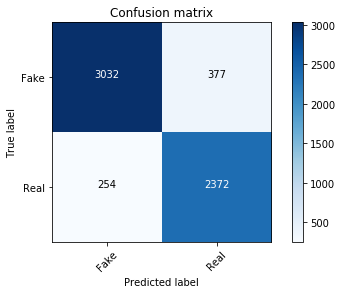

In [94]:
cm= metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes =['Fake','Real'])

In [95]:
### Determining the fake words using the vector

In [96]:
feature_names= cv.get_feature_names()

In [97]:
feature_names

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid',
 'accident',
 'accord',
 'account',
 'accus',
 'accus trump',
 'achiev',
 'acknowledg',
 'acknowledg emf',
 'acknowledg emf damag',
 'aclu',
 'acquit',
 'acquitt',
 'acr',
 'across',
 'act',
 'act like',
 'act new',
 'act new york',
 'action',
 'activ',
 'activist',
 'actor',
 'actual',
 'ad',
 'adam',
 'add',
 'addict',
 'address',
 'adhd',
 'admin',
 'administr',
 'admir',
 'admit',
 'adopt',
 'adult',
 'advanc',
 'advertis',
 'advic',
 'advis',
 'advis new',
 'advis new york',
 'advisor',
 'advoc',
 'affair',
 'affect',
 'affili',
 'affirm',
 'afford',
 'afghan',
 'afghanistan',
 'africa',
 'african',
 'african american',
 'ag',
 'age',
 'age new',
 'age new york',
 'agenc',
 'agenda',
 'agenda breitbart',
 'agent',
 'aggress',
 '

In [98]:
classifier.coef_[0]

array([ -9.31683774,  -8.50590752,  -9.31683774, ..., -10.7031321 ,
        -8.62369056,  -9.31683774])

In [99]:
# most negative value is the most fake word and most positive is the most true word.

In [100]:
# Top True words

In [101]:
sorted(zip(classifier.coef_[0], feature_names),reverse=True)[:20]

[(-3.9841189479057038, 'trump'),
 (-4.2669817339215355, 'hillari'),
 (-4.375195318561769, 'clinton'),
 (-4.862490444917565, 'elect'),
 (-5.17370301477954, 'new'),
 (-5.282597103018677, 'comment'),
 (-5.332494074163301, 'video'),
 (-5.360797850326152, 'war'),
 (-5.3655940225896455, 'hillari clinton'),
 (-5.399827194231888, 'us'),
 (-5.404814735742927, 'fbi'),
 (-5.499125415214168, 'email'),
 (-5.521348551998878, 'world'),
 (-5.555637625477511, 'vote'),
 (-5.609381901484201, 'obama'),
 (-5.705919828526849, 'donald'),
 (-5.7473050446897025, 'donald trump'),
 (-5.843319697929291, 'say'),
 (-5.8511018383713465, 'russia'),
 (-5.858945015832372, 'presid')]

In [102]:
# Top Fake Words

In [103]:
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-10.703132102290963, 'abe'),
 (-10.703132102290963, 'abroad'),
 (-10.703132102290963, 'abus new'),
 (-10.703132102290963, 'abus new york'),
 (-10.703132102290963, 'academi'),
 (-10.703132102290963, 'accid'),
 (-10.703132102290963, 'aclu'),
 (-10.703132102290963, 'act new'),
 (-10.703132102290963, 'act new york'),
 (-10.703132102290963, 'advic'),
 (-10.703132102290963, 'advis new'),
 (-10.703132102290963, 'advis new york'),
 (-10.703132102290963, 'age new'),
 (-10.703132102290963, 'age new york'),
 (-10.703132102290963, 'agenda breitbart'),
 (-10.703132102290963, 'aleppo new'),
 (-10.703132102290963, 'aleppo new york'),
 (-10.703132102290963, 'ali'),
 (-10.703132102290963, 'allegedli'),
 (-10.703132102290963, 'america breitbart')]

### Testing model on Test Data

In [104]:
test=pd.read_csv('fake-news/test.csv')

In [105]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [106]:
test.shape

(5200, 4)

In [107]:
test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [108]:
test[['title', 'author']] = test[['title', 'author']].fillna(value='missing')
test = test.fillna(' ')

In [109]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,missing,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [110]:
test.shape

(5200, 4)

In [111]:
test.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

In [112]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(test)):
    review = re.sub('[^a-zA-Z]', ' ', test['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [113]:
corpus[1]

'russian warship readi strike terrorist near aleppo'

In [114]:
type(test['text'])

pandas.core.series.Series

In [115]:
## Applying Countvectorizer
# Creating Bag of Words 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [116]:
test_predictions= classifier.predict(X)

In [117]:
submission = pd.DataFrame({'id':test.id, 'label':test_predictions})
submission.shape

(5200, 2)

In [118]:
submission.head()

,id,label
0,20800,0
1,20801,1
2,20802,1
3,20803,0
4,20804,1


#### Using MultinominalNB Algorithm with TF-IDF

In [120]:
messages=df.copy()

In [121]:
messages.reset_index(inplace=True)

In [122]:
messages.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [131]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [132]:
corpus[2]

'truth might get fire'

In [133]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()


In [134]:
X.shape

(18285, 5000)

In [135]:
y=messages['label']

In [138]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [139]:
tfidf_v.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [140]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [141]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [142]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### MultinomialNB Algorithm 

In [144]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [145]:
from sklearn import metrics
import numpy as np
import itertools

In [146]:

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.877


Confusion matrix, without normalization


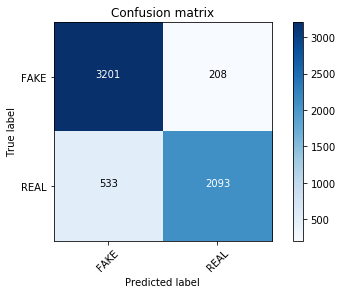

In [147]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [148]:
feature_names= cv.get_feature_names()

In [149]:
feature_names

['aaron',
 'abandon',
 'abba',
 'abbi',
 'abbi martin',
 'abbi martin expos',
 'abc',
 'abe',
 'abedin',
 'abedin email',
 'abolish',
 'abort',
 'abram',
 'abroad',
 'abroad new',
 'abroad new york',
 'absolut',
 'abus',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'accid',
 'accident',
 'accord',
 'account',
 'accus',
 'accus russia',
 'acquit',
 'acquitt',
 'across',
 'across countri',
 'act',
 'action',
 'activ',
 'activist',
 'actual',
 'ad',
 'adam',
 'add',
 'addict',
 'addict info',
 'addict info knowledg',
 'address',
 'admin',
 'administr',
 'admir',
 'admir endors',
 'admir endors trump',
 'admit',
 'adopt',
 'adult',
 'advanc',
 'advertis',
 'advis',
 'advoc',
 'affair',
 'affect',
 'affirm',
 'affleck',
 'afford',
 'afghan',
 'afghanistan',
 'afraid',
 'africa',
 'african',
 'ag',
 'age',
 'agenc',
 'agenda',
 'agent',
 'ago',
 'agre',
 'agreement',
 'ahca',
 'ahead',
 'ahmad',
 'ahora',
 'aid',
 'ail',
 'aim',
 'air',
 'air forc',
 'airbag',
 'airlin',
 'airport',

In [150]:
classifier.coef_[0]

array([-8.90519136, -8.41084306, -9.04267238, ..., -9.82450081,
       -8.03570398, -9.0740115 ])

In [151]:
# most negative value is the most fake word and most positive is the most true word.

In [152]:
#True Words

In [154]:
sorted(zip(classifier.coef_[0], feature_names),reverse=True)[:20]

[(-4.951661451266545, 'hear breitbart'),
 (-4.9836440093258165, 'trump command'),
 (-5.0715993557976695, 'choic'),
 (-5.384790926247131, 'eastern'),
 (-5.752148587555774, 'war parti'),
 (-5.8056545453863135, 'twitchi'),
 (-5.80937407836247, 'user'),
 (-5.819668439186739, 'cnn'),
 (-5.83155892006231, 'witch hunt'),
 (-5.857274324927667, 'heartbreak'),
 (-5.86618901217992, 'famili target'),
 (-6.00338285207342, 'electr'),
 (-6.011379593929595, 'violat'),
 (-6.070461999772961, 'nyu'),
 (-6.180420719774722, 'alt right'),
 (-6.239882461227069, 'russia'),
 (-6.268464572122786, 'presidenti candid'),
 (-6.291691956561136, 'die new'),
 (-6.29404647166565, 'breitbart news'),
 (-6.326062288098036, 'widen')]

In [155]:
#Fake Words

In [153]:
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-9.824500812897682, 'abbi martin'),
 (-9.824500812897682, 'abedin'),
 (-9.824500812897682, 'abroad'),
 (-9.824500812897682, 'abroad new'),
 (-9.824500812897682, 'abroad new york'),
 (-9.824500812897682, 'access'),
 (-9.824500812897682, 'across'),
 (-9.824500812897682, 'ad'),
 (-9.824500812897682, 'adam'),
 (-9.824500812897682, 'affirm'),
 (-9.824500812897682, 'afford'),
 (-9.824500812897682, 'afghan'),
 (-9.824500812897682, 'ahmad'),
 (-9.824500812897682, 'ahora'),
 (-9.824500812897682, 'aim'),
 (-9.824500812897682, 'aleppo syria'),
 (-9.824500812897682, 'alert'),
 (-9.824500812897682, 'ali'),
 (-9.824500812897682, 'allahu'),
 (-9.824500812897682, 'alter')]

Thus we are taking the one with teh Count Vector and saving the submission file using it.

In [156]:
submission.head()

,id,label
0,20800,0
1,20801,1
2,20802,1
3,20803,0
4,20804,1


In [157]:
submission.to_csv('submission.csv', index=False)